In [176]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as feth
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [177]:
d33=pd.read_csv('E:/yadian.csv')  #读取数据集
x=d33[['取向因子y','取向因子x',' PZT体积分数']]
y=d33['d33']
sc_X = StandardScaler()#对数据进行归一化处理
x = sc_X.fit_transform(x) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [178]:
ridge_model = Ridge(alpha=1,normalize=True)
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)

In [179]:
from sklearn.metrics import mean_squared_error as MSE
ridge_model.score(x_test,y_test)

0.5396259798729183

In [180]:
MSE=MSE(y_pred,y_test)
print(MSE) #均方误差

196.70707827918062


In [181]:
cross_val_score(ridge_model,x,y,cv=10,scoring = 'r2')  #交叉验证

array([0.38059184, 0.52062354, 0.58486371, 0.66988821, 0.56096462,
       0.54779803, 0.37973049, 0.13862324, 0.63135038, 0.4011746 ])

In [182]:
from sklearn.linear_model import RidgeCV
Ridge_ = RidgeCV(alphas=np.arange(0.1,1,0.01)
                #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
                ).fit(x, y)
#无关交叉验证的岭回归结果
Ridge_.score(x,y)
#调用所有交叉验证的结果
Ridge_.cv_values_.shape
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)
Ridge_.cv_values_
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

0.9899999999999995

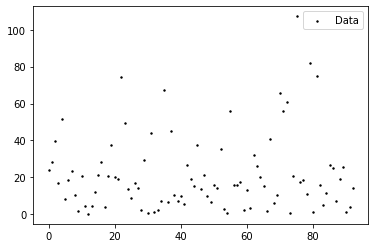

In [183]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(range(len(y_test)),y_test,c="black",label= "Data",s=2)
plt.legend()
plt.show()

In [184]:
print(range(len(y_test)))

range(0, 93)


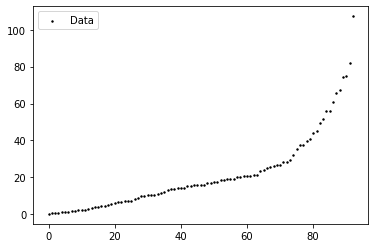

In [185]:
plt.scatter(range(len(y_test)),sorted(y_test),c="black",label= "Data",s=2)
plt.legend()
plt.show()

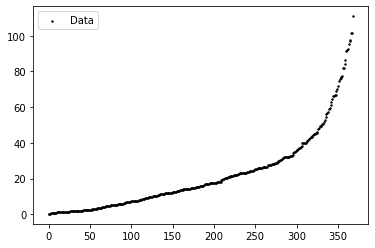

In [186]:
plt.scatter(range(len(y_train)),sorted(y_train),c="black",label= "Data",s=2)
plt.legend()
plt.show()

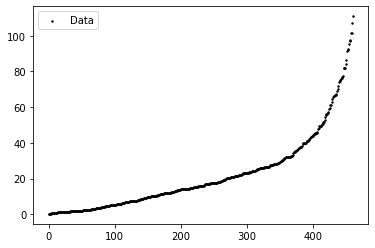

In [187]:
plt.scatter(range(len(y)),sorted(y),c="black",label= "Data",s=2)
plt.legend()
plt.show()

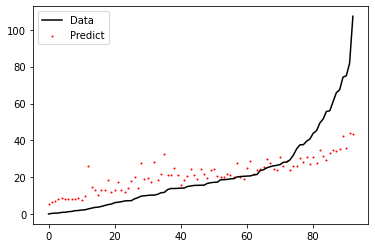

In [188]:
ind = np.argsort(y_test)
ind
y_test.tolist().index(y_test.min()) #索引出真实y的最小值的索引
y_test
sorted(y_test)
y_pred = pd.DataFrame(y_pred)
y_pred = pd.DataFrame(y_pred,index=ind) #这一步很关键
y_pred
#绘制图像
plt.plot(range(len(y_test)),sorted(y_test),c="black",label= "Data")
plt.scatter(range(len(y_pred)),y_pred,c="red",label = "Predict",s=1)
plt.legend()
plt.show()

In [189]:
print(ind)

439    12
431    73
286    54
49     30
441    90
       ..
50     35
309    22
239    81
382    79
211    75
Name: d33, Length: 93, dtype: int64


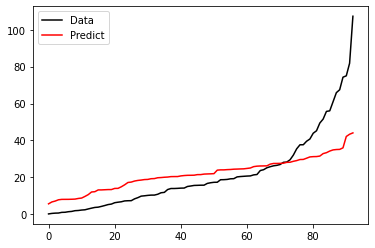

In [190]:
plt.plot(range(len(y_test)),sorted(y_test),c="black",label= "Data")
plt.plot(range(len(y_pred)),sorted(y_pred.iloc[:,0]),c="red",label = "Predict")
plt.legend()
plt.show()

In [191]:
alphas=np.arange(0.1,1,0.01)
print(alphas)

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]
